In [29]:
import geopandas as gpd
import pandas as pd

gt_tracks = gpd.read_file('./Shapefiles/ground_truth_tracks.shp')
detected_tracks = gpd.read_file('./Shapefiles/detected_tracks_vmti_time.shp')

# Check CRS and reproject if needed
if gt_tracks.crs != 'EPSG:2193':
    gt_tracks = gt_tracks.to_crs('EPSG:2193')
if detected_tracks.crs != 'EPSG:2193':
    detected_tracks = detected_tracks.to_crs('EPSG:2193')

iou_values = []
track_ids = []
union_val = []
intersection_val = []

for gt_id, gt_track in gt_tracks.iterrows():
    detected_track = detected_tracks[detected_tracks['True_Track'] == gt_track['Track_ID']]
    
    if len(detected_track) > 0:
        intersection = gt_track.geometry.intersection(detected_track.unary_union)
        union = gt_track.geometry.union(detected_track.unary_union)
        iou = intersection.area / union.area
        iou_values.append(iou)
        intersection_val.append(intersection.area)
        union_val.append(union.area)
        track_ids.append(gt_track['Track_ID'])

iou_df = pd.DataFrame({'Track_ID': track_ids, 'Intersection Area': intersection_val, 'Union Area': union_val, 'IoU value': iou_values})

pd.options.display.float_format = '{:.6f}'.format

mean_iou = sum(iou_values) / len(iou_values)
print("Mean IoU:", mean_iou)

new_df = iou_df[['Track_ID', 'IoU value']].sort_values(by='Track_ID', ascending=True)
print(new_df)



Mean IoU: 0.02963079684323596
   Track_ID  IoU value
0         1   0.000000
1         2   0.024285
2         3   0.022955
3         4   0.025218
4         5   0.142356
5         6   0.000000
8         8   0.000000
9         9   0.004630
6        10   0.052750
7        11   0.024115


C:\Users\laure\AppData\Local\Temp\ipykernel_3020\3684152883.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


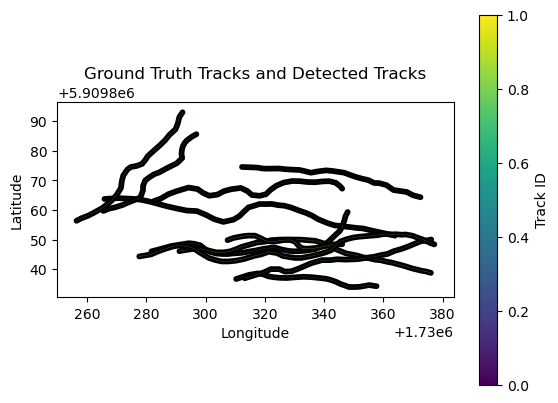

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefiles
gt_tracks = gpd.read_file('./Shapefiles/ground_truth_tracks.shp')
detected_tracks = gpd.read_file('./Shapefiles/detection_tracks.shp')

# Check CRS and reproject if needed
if gt_tracks.crs != 'EPSG:2193':
    gt_tracks = gt_tracks.to_crs('EPSG:2193')
if detected_tracks.crs != 'EPSG:2193':
    detected_tracks = detected_tracks.to_crs('EPSG:2193')

# Concatenate the two DataFrames
merged_tracks = pd.concat([gt_tracks, detected_tracks])

# Plot the merged tracks using Track ID as the color variable
ax = merged_tracks.plot(column='Track_ID', cmap='viridis', linewidth=2, edgecolor='black')

# Set plot title and axis labels
plt.title('Ground Truth Tracks and Detected Tracks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Track ID')

# Display the plot
plt.show()

